Тема: оценка важности признаков (текстовые данные)

Задание: провести классификацию датасета "Fetch20Newsgroups" и определить
ключевые слова для каждого класса



                          precision    recall  f1-score   support

             alt.atheism       0.58      0.58      0.58       151
           comp.graphics       0.68      0.68      0.68       202
 comp.os.ms-windows.misc       0.70      0.65      0.68       195
comp.sys.ibm.pc.hardware       0.61      0.66      0.64       183
   comp.sys.mac.hardware       0.80      0.70      0.74       205
          comp.windows.x       0.82      0.77      0.79       215
            misc.forsale       0.75      0.69      0.72       193
               rec.autos       0.72      0.72      0.72       196
         rec.motorcycles       0.45      0.76      0.56       168
      rec.sport.baseball       0.85      0.83      0.84       211
        rec.sport.hockey       0.95      0.87      0.91       198
               sci.crypt       0.90      0.76      0.82       201
         sci.electronics       0.61      0.67      0.64       202
                 sci.med       0.80      0.86      0.83       194
         

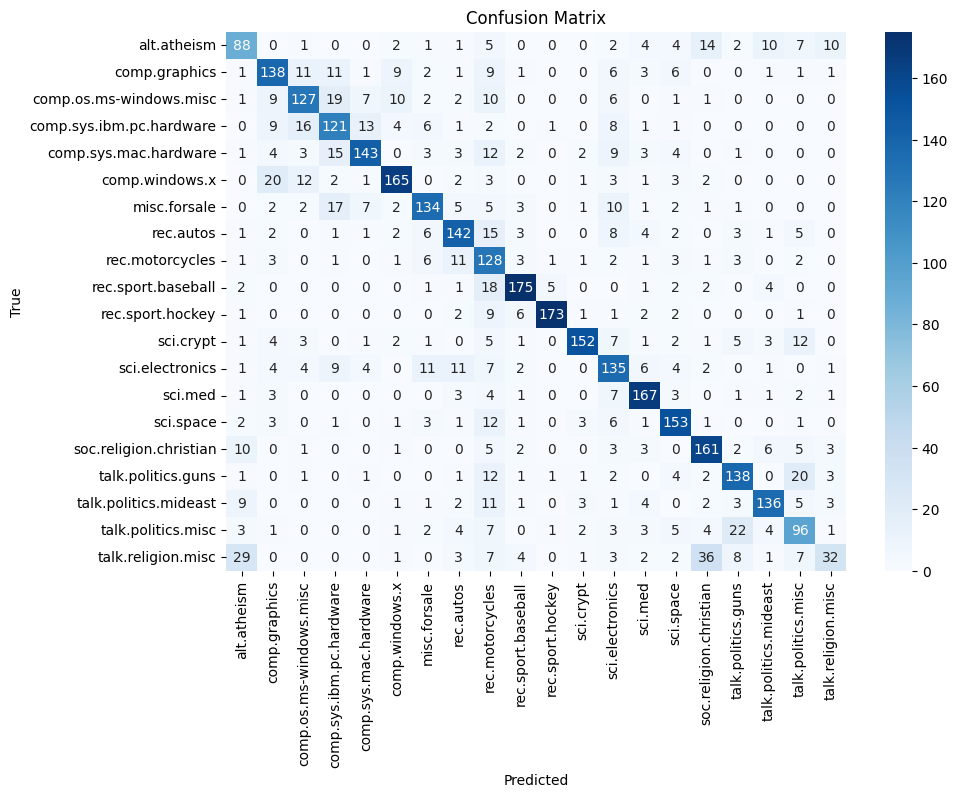


Top features for class 'alt.atheism':
god: 3.742
atheism: 3.712
atheists: 3.580
religion: 3.359
atheist: 3.095
islamic: 2.942
islam: 2.699
bobby: 2.610
morality: 2.605
bible: 2.553

Top features for class 'comp.graphics':
graphics: 7.486
3d: 4.522
image: 4.490
images: 3.008
files: 2.879
pov: 2.810
computer: 2.804
format: 2.676
tiff: 2.600
animation: 2.568

Top features for class 'comp.os.ms-windows.misc':
windows: 8.515
microsoft: 3.889
file: 3.759
cica: 3.406
win: 3.314
ax: 2.921
ms: 2.832
driver: 2.818
win3: 2.632
nt: 2.618

Top features for class 'comp.sys.ibm.pc.hardware':
bios: 4.138
card: 3.704
pc: 3.537
drive: 3.501
ide: 3.318
monitor: 3.308
scsi: 3.250
motherboard: 2.746
monitors: 2.732
486: 2.722

Top features for class 'comp.sys.mac.hardware':
mac: 7.348
apple: 5.983
centris: 3.455
lc: 3.385
duo: 3.238
quadra: 3.178
macs: 3.159
simms: 3.149
se: 3.139
monitor: 3.109

Top features for class 'comp.windows.x':
motif: 5.367
server: 5.214
window: 5.144
xterm: 4.308
x11r5: 3.822
wi

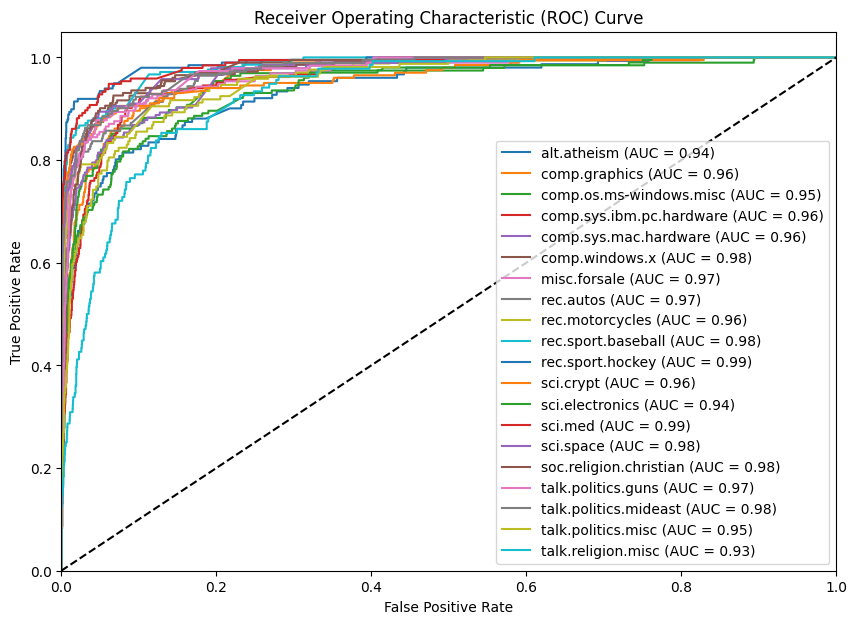

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


feature_names = vectorizer.get_feature_names_out()
for i, class_name in enumerate(newsgroups.target_names):
    top_features = sorted(zip(model.coef_[i], feature_names), reverse=True)[:10]
    print(f"\nTop features for class '{class_name}':")
    for coef, feat in top_features:
        print(f"{feat}: {coef:.3f}")



from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)

plt.figure(figsize=(10, 7))
for i in range(len(newsgroups.target_names)):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{newsgroups.target_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()